<a href="https://colab.research.google.com/github/Jayant2304/Reinforcement_learrning/blob/Self_driving_car/selfcarupdate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install python-opengl -y > /dev/null 2>&1
!apt-get install x11-utils
!apt install xvfb -y


!pip install piglet


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 318 kB of archives.
After this operation, 1,053 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxxf86dga1 amd64 2:1.1.5-0ubuntu3 [12.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-utils amd64 7.7+5build2 [206 kB]
Fetched

In [ ]:
import gym

In [ ]:
env = gym.make("Taxi-v3").env

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
env.reset()

144

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay

In [ ]:
!pip install gym pyvirtualdisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0,size=(400,300))
display.start()

In [ ]:
!python -m pip install pygame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


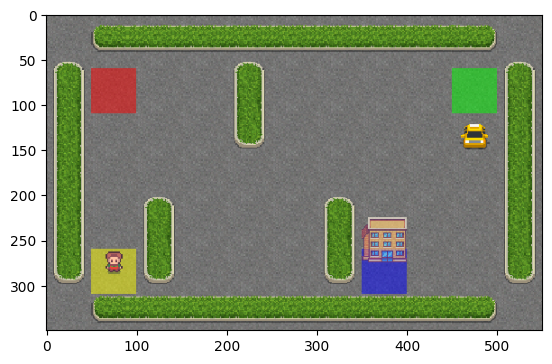

In [ ]:
env.reset()
prev_screen=env.render(mode='rgb_array')
plt.imshow(prev_screen)
for i in range(40):
  action=env.action_space.sample()
  obs,reward,done,info=env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  if done:
    break
ipythondisplay.clear_output(wait=True)
env.close()
ipythondisplay.clear_output(wait=True)
env.close()

In [ ]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
state = env.encode(3,1,2,0)
print("State:",state)
env.s=state

Action Space Discrete(6)
State Space Discrete(500)
State: 328


In [ ]:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

In [ ]:
env.s =328
epochs=0
penalties, rewards=0,0
frames=[]
done=False
while not done:
  action= env.action_space.sample()
  state,reward,done,info = env.step(action)
  if reward == -10:
    penalties +=1
  frames.append({
      'frame': env.render(mode='ansi'),
      'state': state,
      'action':action,
      'reward':reward
  })
  epochs +=1
  print("Timesteps taken: {}".format(epochs))
  print("Penalties incureed: {}".format(penalties))

Streaming output truncated to the last 5000 lines.
Timesteps taken: 2078
Penalties incureed: 701
Timesteps taken: 2079
Penalties incureed: 701
Timesteps taken: 2080
Penalties incureed: 701
Timesteps taken: 2081
Penalties incureed: 702
Timesteps taken: 2082
Penalties incureed: 702
Timesteps taken: 2083
Penalties incureed: 702
Timesteps taken: 2084
Penalties incureed: 702
Timesteps taken: 2085
Penalties incureed: 702
Timesteps taken: 2086
Penalties incureed: 703
Timesteps taken: 2087
Penalties incureed: 704
Timesteps taken: 2088
Penalties incureed: 704
Timesteps taken: 2089
Penalties incureed: 704
Timesteps taken: 2090
Penalties incureed: 705
Timesteps taken: 2091
Penalties incureed: 705
Timesteps taken: 2092
Penalties incureed: 706
Timesteps taken: 2093
Penalties incureed: 706
Timesteps taken: 2094
Penalties incureed: 706
Timesteps taken: 2095
Penalties incureed: 707
Timesteps taken: 2096
Penalties incureed: 708
Timesteps taken: 2097
Penalties incureed: 708
Timesteps taken: 2098
Penalti

In [ ]:
from IPython.display import clear_output
from time import sleep
def print_frames(frames):
  for i, frame in enumerate(frames):
    clear_output(wait=True)
    print(frame['frame'])
    print(f"Timestep:{i+1}")
    print(f"State:{frame['state']}")
    print(f"Action:{frame['action']}")
    print(f"Reward:{frame['reward']}")
    sleep(0.1)
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep:4577
State:475
Action:5
Reward:20


In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n,env.action_space.n])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%%time
 import random
 from IPython.display import clear_output
 alpha=0.1
 gamma=0.6
 epsilon=0.1
 all_epochs=[]
 all_penalties=[]
 for i in range(1,100001):
  state = env.reset()
  epochs, penalties,reward,=0,1,0
  done = False
  while not done:
    if random.uniform(0,1)<epsilon:
      action=env.action_space.sample()
    else:
      action = np.argmax(q_table[state])
    next_state,reward,done,info=env.step(action)
    old_value= q_table[state,action]
    next_max=np.max(q_table[next_state])
    new_value = (1-alpha)*old_value +alpha*(reward + gamma*next_max)
    q_table[state,action]=new_value
    if reward ==-10:
      penalties+=1
    state = next_state
    epochs+=1
  if i%100==0:
    clear_output(wait=True)
    print(f"Episode: {i}")
print("Training finished \n")


Episode: 100000
Training finished 

CPU times: user 1min 21s, sys: 7.63 s, total: 1min 29s
Wall time: 1min 27s


In [ ]:
q_table[328]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([ -2.39700865,  -2.27325184,  -2.39356415,  -2.35174233,
        -9.75665861, -10.20809134])

In [ ]:
total_epochs, total_penalties =1,1
episodes =100
for _ in range(episodes):
  state=env.reset()
  epochs, penalties, reward = 0,1,0
  done=False
  while not done:
    action = np.argmax(q_table[state])
    state, reward, done, info = env.step(action)
    if reward ==-10:
      penalties +=1
      epochs+=1
    total_penalties +=penalties
    total_epochs+=epochs
print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode:{total_epochs/episodes}")
print(f"Average penalties per episode:{total_penalties/episodes}")


Results after 100 episodes:
Average timesteps per episode:0.01
Average penalties per episode:13.13


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)
for _ in range(episodes):
  action=env.action_space.sample()
  state,penalty,done,info=env.step(action)
  screen = env.render(mode='rgb_array')
  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())
  if done:
    break
ipythondisplay.clear_output(wait=True)
env.close()
ipythondisplay.clear_output(wait=True)
env.close()